In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")

Skipping, found downloaded files in "./house-prices-advanced-regression-techniques" (use force=True to force download)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
raw_df = pd.read_csv("/content/house-prices-advanced-regression-techniques/train.csv")
raw_test_df = pd.read_csv("/content/house-prices-advanced-regression-techniques/test.csv")
pd.set_option('display.max_columns', 82)
import warnings
warnings.filterwarnings("ignore")
import time

In [ ]:
raw_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

**Filling Missing Values**

In [ ]:
fill_values = {
    "LotFrontage": raw_df["LotFrontage"].mean(),
    "Alley": "No Alley",
    "MasVnrType": "None",
    "BsmtQual": "No Basement",
    "BsmtCond": "No Basement",
    "BsmtExposure": "No Basement",
    "BsmtFinType1": "No Basement",
    "BsmtFinType2": "No Basement",
    "Electrical": "SBrkr",
    "KitchenQual": "TA",
    "FireplaceQu": "No Fireplace",
    "GarageType": "No Garage",
    "GarageFinish": "No Garage",
    "GarageYrBlt": 0,
    "GarageQual": "No Garage",
    "GarageCond": "No Garage",
    "PoolQC": "No Pool",
    "Fence": "No Fence",
    "MiscFeature": "No Misc",
    "MasVnrArea": 0
}


def fill_missing_values(df, fill_values):
    for column, value in fill_values.items():
        df[column] = df[column].fillna(value)

fill_missing_values(raw_df, fill_values)
fill_missing_values(raw_test_df, fill_values)

**Custom Encoding Data**

In [ ]:
def func1(row):
  if row["Utilities"] == "AllPub":
    row["E"]=1
    row["G"]=1
    row["W"]=1
    row["S"]=1
  elif row["Utilities"] == "NoSeWa":
    row["E"]=1
    row["G"]=1
    row["W"]=0
    row["S"]=0
  elif row["Utilities"] == "NoSewr":
    row["E"]=1
    row["G"]=1
    row["W"]=1
    row["S"]=0
  elif row["Utilities"] == "ELO":
    row["E"]=1
    row["G"]=0
    row["W"]=0
    row["S"]=0
  else:
    row["E"]=0
    row["G"]=0
    row["W"]=0
    row["S"]=0
  return row
raw_df = raw_df.apply(func1, axis=1)
raw_test_df = raw_test_df.apply(func1, axis=1)

In [ ]:
raw_df.drop(columns=["Utilities"], inplace=True)
raw_test_df.drop(columns=["Utilities"], inplace=True)

In [ ]:
dic1 = {
    "No Basement":0,
    "No Fireplace": 0,
    "No Garage": 0,
    "No Pool": 0,
    "Po":1,
    "Fa":2,
    "TA":3,
    "Gd":4,
    "Ex":5
}
raw_df["ExterQual"] = raw_df["ExterQual"].map(dic1)
raw_df["ExterCond"] = raw_df["ExterCond"].map(dic1)
raw_df["HeatingQC"] = raw_df["HeatingQC"].map(dic1)
raw_df["KitchenQual"] = raw_df["KitchenQual"].map(dic1)

raw_test_df["ExterQual"] = raw_test_df["ExterQual"].map(dic1)
raw_test_df["ExterCond"] = raw_test_df["ExterCond"].map(dic1)
raw_test_df["HeatingQC"] = raw_test_df["HeatingQC"].map(dic1)
raw_test_df["KitchenQual"] = raw_test_df["KitchenQual"].map(dic1)

raw_df["BsmtQual"] = raw_df["BsmtQual"].map(dic1)
raw_df["BsmtCond"] = raw_df["BsmtCond"].map(dic1)
raw_test_df["BsmtQual"] = raw_test_df["BsmtQual"].map(dic1)
raw_test_df["BsmtCond"] = raw_test_df["BsmtCond"].map(dic1)
raw_df["FireplaceQu"] = raw_df["FireplaceQu"].map(dic1)
raw_test_df["FireplaceQu"] = raw_test_df["FireplaceQu"].map(dic1)

raw_df["GarageQual"] = raw_df["GarageQual"].map(dic1)
raw_df["GarageCond"] = raw_df["GarageCond"].map(dic1)
raw_test_df["GarageQual"] = raw_test_df["GarageQual"].map(dic1)
raw_test_df["GarageCond"] = raw_test_df["GarageCond"].map(dic1)

raw_df["PoolQC"] = raw_df["PoolQC"].map(dic1)
raw_test_df["PoolQC"] = raw_test_df["PoolQC"].map(dic1)

In [ ]:
dic2 = {
    "No Basement": 0,
    "No": 1,
    "Mn": 2,
    "Av": 3,
    "Gd": 4
}
raw_df["BsmtExposure"] = raw_df["BsmtExposure"].map(dic2)
raw_test_df["BsmtExposure"] = raw_test_df["BsmtExposure"].map(dic2)

In [ ]:
dic3 = {
    "No Basement": 0,
    "Unf": 1,
    "LwQ": 2,
    "Rec": 3,
    "BLQ": 4,
    "ALQ": 5,
    "GLQ":6
}
raw_df["BsmtFinType1"] = raw_df["BsmtFinType1"].map(dic3)
raw_df["BsmtFinType2"] = raw_df["BsmtFinType2"].map(dic3)
raw_test_df["BsmtFinType1"] = raw_test_df["BsmtFinType1"].map(dic3)
raw_test_df["BsmtFinType2"] = raw_test_df["BsmtFinType2"].map(dic3)

In [ ]:
dic4 = {
    "No Garage": 0,
    "Unf": 1,
    "RFn": 2,
    "Fin": 3
}
raw_df["GarageFinish"] = raw_df["GarageFinish"].map(dic4)
raw_test_df["GarageFinish"] = raw_test_df["GarageFinish"].map(dic4)

In [ ]:
dic5 = {
    "N": 0,
    "P":1,
    "Y":2
}
raw_df["PavedDrive"] = raw_df["PavedDrive"].map(dic5)
raw_test_df["PavedDrive"] = raw_test_df["PavedDrive"].map(dic5)

In [ ]:
raw_df.shape

(1460, 84)

In [ ]:
raw_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [ ]:
categorical_cols = ["MSSubClass", "MSZoning", "Street","Alley", "LotShape", "LandContour",
                    "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
                    "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType",
                    "Foundation", "Heating", "CentralAir", "Electrical","TotRmsAbvGrd",
                    "Functional", "GarageType", "Fence", "MiscFeature", "SaleType", "SaleCondition"]
numeric_cols = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd",
                "MasVnrArea", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
                "BsmtFinType1", "BsmtFinType2", "BsmtFinSF1","BsmtFinSF2",  "BsmtUnfSF","TotalBsmtSF",
                "HeatingQC", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
                "BsmtFullBath","BsmtHalfBath", "FullBath", "HalfBath","BedroomAbvGr",
                "KitchenAbvGr", "KitchenQual", "Fireplaces", "FireplaceQu","GarageYrBlt", "GarageFinish",
                "GarageCars", "GarageArea", "GarageQual", "GarageCond", "PavedDrive",
                "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea",
                "PoolQC", "MiscVal", "MoSold", "YrSold", "E", "G", "W", "S"]

In [ ]:
len(categorical_cols), len(numeric_cols)

(29, 53)

In [ ]:
df = raw_df[categorical_cols+numeric_cols+["SalePrice"]]
df_test = raw_test_df[categorical_cols+numeric_cols]

In [ ]:
raw_df.isna().sum().sum()

0

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe.fit(df[categorical_cols])
df[list(ohe.get_feature_names_out())] = ohe.transform(df[categorical_cols])
df_test[list(ohe.get_feature_names_out())] = ohe.transform(df_test[categorical_cols])

**Scaling Data**

In [ ]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [ ]:
df = df[numeric_cols+list(ohe.get_feature_names_out())+["SalePrice"]]
df_test = df_test[numeric_cols+list(ohe.get_feature_names_out())]

In [ ]:
df_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Gar2,MiscFeature_No Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.451936,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.570750,-0.689604,-0.238112,-0.558153,0.117884,-0.590555,-0.259078,0.843853,0.053428,0.604293,-0.672923,-0.400017,-1.193952,-0.689929,-0.795163,-0.120242,-1.179256,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.771091,-0.951226,-1.008334,0.203422,-0.801942,-1.026858,1.202536,0.262542,0.265618,0.289745,0.365179,-0.704483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.497357,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.027027,-0.689604,-0.238112,-0.558153,0.117884,-0.590555,0.690115,-0.277189,1.051363,-0.288653,-0.365032,0.619239,-1.193952,0.430511,-0.795163,-0.120242,-0.354966,-0.819964,-0.241061,-1.026041,1.227585,0.163779,-0.211454,0.735994,-0.951226,-1.008334,0.196807,-0.801942,-1.026858,-0.753188,0.262542,0.265618,0.289745,2.384400,-0.160950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.179413,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.570750,-0.689604,-0.238112,0.583168,0.117884,-0.590555,1.164712,-0.277189,0.761852,-0.288653,-0.974021,-0.295127,-0.151386,-0.607125,0.811239,-0.120242,0.216136,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.771091,0.600495,0.648890,0.282797,1.438891,0.311725,0.042202,0.262542,0.265618,0.289745,0.939819,-0.191147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.361095,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.460051,-0.689604,-0.238112,-0.558153,0.117884,-0.590555,1.164712,-0.277189,0.347326,-0.288653,-0.550672,-0.299687,0.891179,-0.612300,0.758532,-0.120242,0.168544,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.735994,0.600495,1.201298,0.285002,1.438891,0.311725,-0.013943,0.262542,0.265618,0.289745,2.121024,-0.160950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.228623,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.570750,1.052302,-0.238112,0.583168,0.117884,-0.590555,0.690115,-0.277189,-0.396190,-0.288653,1.018211,0.507509,0.891179,0.303718,-0.795163,-0.120242,-0.448246,-0.819964,-0.241061,0.789741,-0.761621,-1.062465,-0.211454,0.735994,-0.951226,-1.008334,0.271773,0.318475,0.311725,0.154492,0.262542,0.265618,0.289745,-0.752176,0.533564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,TotRmsAbvGrd_14,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Gar2,MiscFeature_No Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,1.052302,-0.238112,0.583168,0.117884,-0.590555,1.164712,-0.277189,0.575425,-0.288653,-0.944591,-0.459303,0.891179,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.735994,-0.951226,-1.008334,0.296026,0.318475,0.311725,0.351000,0.262542,0.265618,0.289745,-0.752176,0.216503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,-0.689604,-0.238112,0.583168,0.117884,2.220999,0.690115,-0.277189,1.171992,-0.288653,-0.641228,0.466465,0.891179,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.771091,0.600495,0.648890,0.236495,0.318475,0.311725,-0.060731,0.262542,0.265618,0.289745,1.626195,-0.704483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,1.052302,-0.238112,0.583168,0.117884,0.346630,1.164712,-0.277189,0.092907,-0.288653,-0.301643,-0.313369,0.891179,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.735994,0.600495,0.648890,0.291616,0.318475,0.311725,0.631726,0.262542,0.265618,0.289745,-0.752176,-0.070361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.689604,-0.238112,-0.558153,1.929579,-0.590555,0.690115,-0.277189,-0.499274,-0.288653,-0.061670,-0.687324,-0.151386,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.735994,0.600495,1.201298,0.285002,-0.801942,1.650307,0.790804,0.262542,0.265618,0.289745,-0.752176,-0.176048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,1.052302,-0.238112,0.583168,0.117884,1.283814,1.164712,-0.277189,0.463568,-0.288653,-0.174865,0.199680,0.891179,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,0.735994,0.600495,0.648890,0.289412,0.318475,1.650307,1.698485,0.262542,0.265618,0.289745,0.780197,0.563760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
X = df[numeric_cols+list(ohe.get_feature_names_out())]
y = df["SalePrice"]

**Splitting Data**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df[numeric_cols+list(ohe.get_feature_names_out())], df["SalePrice"], test_size=0.2, random_state=4)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 268), (292, 268), (1168,), (292,))

**Linear Regression Model**

In [ ]:
lr = LinearRegression()
s = time.time()
lr.fit(X_train, y_train)
print("Time taken:",time.time()-s)
preds2 = np.abs(lr.predict(X_val))
preds1 = np.abs(lr.predict(X_train))

rmse_train = np.sqrt(mean_squared_error(y_train, preds1))
rmse_val = np.sqrt(mean_squared_error(y_val, preds2))

mae_train = mean_absolute_error(y_train, preds1)
mae_val = mean_absolute_error(y_val, preds2)

r2_train = r2_score(y_train, preds1)
r2_val = r2_score(y_val, preds2)

print("Training RMSE:", rmse_train)
print("Validation RMSE:", rmse_val)

print("Training MAE:", mae_train)
print("Validation MAE:", mae_val)

print("Training R²:", r2_train)
print("Validation R²:", r2_val)

Time taken: 0.44101595878601074
Training RMSE: 21685.078466052695
Validation RMSE: 27323.325561014808
Training MAE: 14645.24288250962
Validation MAE: 18742.04216728635
Training R²: 0.9276042962678803
Validation R²: 0.8655327192615399


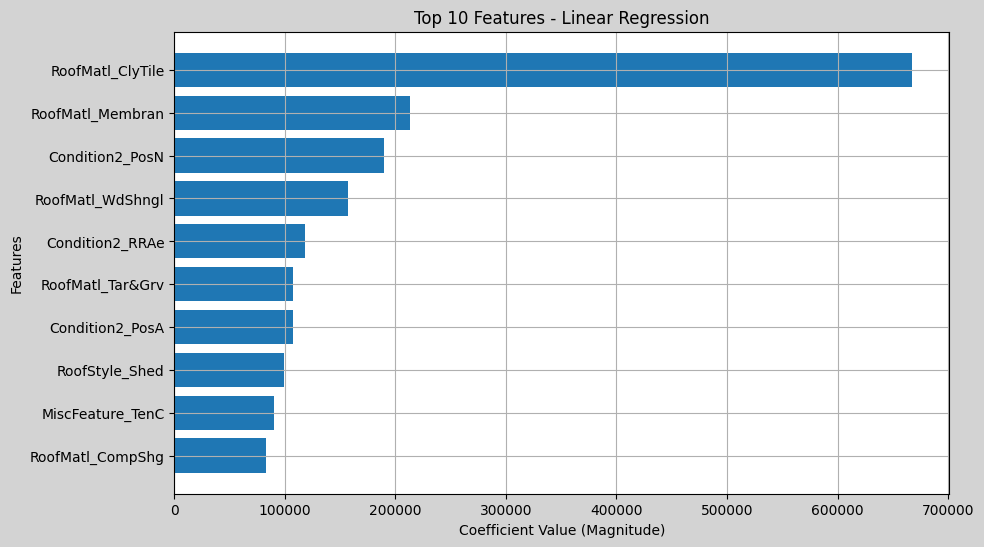

In [ ]:
importance = np.abs(lr.coef_)

top_indices = np.argsort(importance)[-10:]

top_features = X.columns[top_indices].values
top_importance = importance[top_indices]

plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.barh(top_features, top_importance)
plt.title("Top 10 Features - Linear Regression")
plt.xlabel("Coefficient Value (Magnitude)")
plt.ylabel("Features")
plt.gca()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.grid(True)
plt.show()

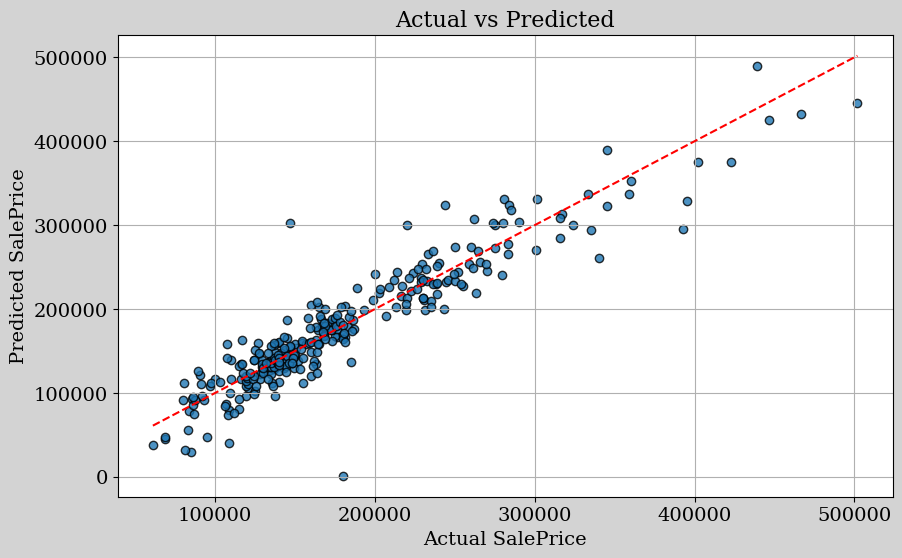

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.scatter(y_val, preds2, marker='o', label='Data Points', linewidths=1, alpha=0.8,  edgecolors='black')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted', fontsize=16)
plt.xlabel('Actual SalePrice', fontsize=14)
plt.ylabel('Predicted SalePrice', fontsize=14)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.grid(True)
plt.show()